In [5]:
#!pip install autogluon
#!pip install pandas

In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection._split import _BaseKFold
import numpy as np
import random

In [7]:
seed_value = 42  # Replace with your desired seed value
random.seed(seed_value)
np.random.seed(seed_value)

In [8]:
x_train_a = pd.read_csv('cleaned_data_quarterly/A/x_train_a.csv')
y_train_a = pd.read_csv('cleaned_data_quarterly/A/train_a.csv')
x_test_a = pd.read_csv('cleaned_data_quarterly/A/x_test_a.csv')

In [9]:
x_train_b = pd.read_csv('cleaned_data_quarterly/B/x_train_b.csv')
y_train_b = pd.read_csv('cleaned_data_quarterly/B/train_b.csv')
x_test_b = pd.read_csv('cleaned_data_quarterly/B/x_test_b.csv')

x_train_b

,date_forecast,absolute_humidity_2m:gm3_Q0,absolute_humidity_2m:gm3_Q1,absolute_humidity_2m:gm3_Q2,absolute_humidity_2m:gm3_Q3,air_density_2m:kgm3_Q0,air_density_2m:kgm3_Q1,air_density_2m:kgm3_Q2,air_density_2m:kgm3_Q3,ceiling_height_agl:m_Q0,...,forecast_day,forecast_hour,calc_year,calc_month,calc_day,calc_hour,direct_rad_x_sun_elevation_Q0,direct_rad_x_sun_elevation_Q1,direct_rad_x_sun_elevation_Q2,direct_rad_x_sun_elevation_Q3
0,2019-01-01 00:00:00,5.6,5.6,5.5,5.4,1.239,1.239,1.240,1.241,1226.4,...,1,0,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,-0.0
1,2019-01-01 01:00:00,5.4,5.4,5.4,5.5,1.241,1.240,1.239,1.239,1157.6,...,1,1,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,-0.0
2,2019-01-01 02:00:00,5.5,5.4,5.4,5.3,1.238,1.238,1.239,1.239,1087.6,...,1,2,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,-0.0
3,2019-01-01 03:00:00,5.3,5.3,5.4,5.4,1.240,1.240,1.240,1.239,1016.4,...,1,3,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,-0.0
4,2019-01-01 04:00:00,5.5,5.6,5.7,5.9,1.239,1.238,1.237,1.236,1029.0,...,1,4,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26937,2023-04-30 19:00:00,4.6,4.6,4.5,4.5,1.275,1.276,1.277,1.278,1636.1,...,30,19,2023.0,4.0,29.0,7.0,0.7652,0.0,-0.0,-0.0
26938,2023-04-30 20:00:00,4.5,4.5,4.5,4.5,1.278,1.279,1.279,1.279,1747.8,...,30,20,2023.0,4.0,29.0,7.0,-0.0000,-0.0,-0.0,-0.0
26939,2023-04-30 21:00:00,4.5,4.5,4.5,4.5,1.279,1.279,1.279,1.279,1797.7,...,30,21,2023.0,4.0,29.0,7.0,-0.0000,-0.0,-0.0,-0.0
26940,2023-04-30 22:00:00,4.5,4.5,4.5,4.5,1.279,1.280,1.280,1.280,1534.3,...,30,22,2023.0,4.0,29.0,7.0,-0.0000,-0.0,-0.0,-0.0


In [10]:
x_train_c = pd.read_csv('cleaned_data_quarterly/C/x_train_c.csv')
y_train_c = pd.read_csv('cleaned_data_quarterly/C/train_c.csv')
x_test_c = pd.read_csv('cleaned_data_quarterly/C/x_test_c.csv')

In [11]:
class CustomTimeSeriesSplit(_BaseKFold):
    def __init__(self, n_splits, train_size=None, test_size=None):
        super().__init__(n_splits, shuffle=False, random_state=None)
        self.train_size = train_size
        self.test_size = test_size

    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        indices = np.arange(n_samples)

        # Define initial sizes if not provided
        train_size = self.train_size or n_samples // (self.n_splits + 1)
        test_size = self.test_size or n_samples // self.n_splits

        for test_start in range(train_size + test_size, n_samples, test_size):
            train_end = test_start - test_size
            train_start = max(train_end - train_size, 0)
            yield indices[train_start:train_end], indices[train_end:test_start]

# Example usage
# tscv = CustomTimeSeriesSplit(n_splits=5, train_size=720, test_size=120)

# for train_idx, test_idx in tscv.split(x_train_a):
#     print("Train indices:", train_idx)
#     print("Test indices:", test_idx)

In [12]:
x_train_a

,date_forecast,absolute_humidity_2m:gm3_Q0,absolute_humidity_2m:gm3_Q1,absolute_humidity_2m:gm3_Q2,absolute_humidity_2m:gm3_Q3,air_density_2m:kgm3_Q0,air_density_2m:kgm3_Q1,air_density_2m:kgm3_Q2,air_density_2m:kgm3_Q3,ceiling_height_agl:m_Q0,...,forecast_day,forecast_hour,calc_year,calc_month,calc_day,calc_hour,direct_rad_x_sun_elevation_Q0,direct_rad_x_sun_elevation_Q1,direct_rad_x_sun_elevation_Q2,direct_rad_x_sun_elevation_Q3
0,2019-06-02 22:00:00,7.7,7.7,7.7,7.7,1.230,1.229,1.228,1.226,1744.9,...,2,22,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,-0.0000
1,2019-06-02 23:00:00,7.7,7.7,7.7,7.7,1.225,1.224,1.223,1.222,1703.6,...,2,23,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,-0.0000
2,2019-06-03 00:00:00,7.7,7.8,7.9,8.1,1.221,1.220,1.219,1.219,1668.1,...,3,0,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,-0.0000
3,2019-06-03 01:00:00,8.2,8.4,8.5,8.6,1.218,1.218,1.218,1.218,1388.4,...,3,1,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,0.0000
4,2019-06-03 02:00:00,8.8,8.9,9.0,9.1,1.219,1.218,1.218,1.217,1108.5,...,3,2,NaN,NaN,NaN,NaN,0.0000,0.0,0.0,2.8638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34056,2023-04-30 19:00:00,4.6,4.6,4.5,4.5,1.275,1.276,1.277,1.278,1633.0,...,30,19,2023.0,4.0,29.0,7.0,0.7652,0.0,-0.0,-0.0000
34057,2023-04-30 20:00:00,4.5,4.5,4.5,4.5,1.279,1.280,1.280,1.280,1742.9,...,30,20,2023.0,4.0,29.0,7.0,-0.0000,-0.0,-0.0,-0.0000
34058,2023-04-30 21:00:00,4.5,4.5,4.5,4.5,1.281,1.281,1.281,1.281,1794.9,...,30,21,2023.0,4.0,29.0,7.0,-0.0000,-0.0,-0.0,-0.0000
34059,2023-04-30 22:00:00,4.5,4.5,4.5,4.5,1.281,1.281,1.281,1.281,1532.9,...,30,22,2023.0,4.0,29.0,7.0,-0.0000,-0.0,-0.0,-0.0000


In [13]:
x_train_a_combined = x_train_a.merge(y_train_a, left_on='date_forecast', right_on='time', how='left')
x_train_a_combined['observed'] = x_train_a_combined['calc_year'].isna().astype(int)
train_data_a = x_train_a_combined.drop(['time', 'calc_year', 'calc_month', 'calc_day', 'calc_hour', 'date_forecast'], axis = 1)
x_test_a['observed'] = x_test_a['calc_year'].isna().astype(int)
test_data_a = x_test_a.drop([ 'calc_year', 'calc_month', 'calc_day', 'calc_hour','date_forecast'], axis = 1)

In [14]:
x_train_b_combined = x_train_b.merge(y_train_b, left_on='date_forecast', right_on='time', how='left')
x_train_b_combined['observed'] = x_train_b_combined['calc_year'].isna().astype(int)

train_data_b = x_train_b_combined.drop(['time', 'calc_year', 'calc_month', 'calc_day', 'calc_hour','date_forecast'], axis = 1)
x_test_b['observed'] = x_test_b['calc_year'].isna().astype(int)
test_data_b = x_test_b.drop([ 'calc_year', 'calc_month', 'calc_day', 'calc_hour','date_forecast'], axis = 1)

In [15]:
x_train_c_combined = x_train_c.merge(y_train_c, left_on='date_forecast', right_on='time', how='left')
x_train_c_combined['observed'] = x_train_c_combined['calc_year'].isna().astype(int)
train_data_c = x_train_c_combined.drop(['time', 'calc_year', 'calc_month', 'calc_day', 'calc_hour','date_forecast'], axis = 1)
x_test_c['observed'] = x_test_c['calc_year'].isna().astype(int)
test_data_c = x_test_c.drop([ 'calc_year', 'calc_month', 'calc_day', 'calc_hour','date_forecast'], axis = 1)

In [16]:
test_data_b

,location,absolute_humidity_2m:gm3_Q0,absolute_humidity_2m:gm3_Q1,absolute_humidity_2m:gm3_Q2,absolute_humidity_2m:gm3_Q3,air_density_2m:kgm3_Q0,air_density_2m:kgm3_Q1,air_density_2m:kgm3_Q2,air_density_2m:kgm3_Q3,ceiling_height_agl:m_Q0,...,wind_speed_w_1000hPa:ms_Q3,forecast_year,forecast_month,forecast_day,forecast_hour,direct_rad_x_sun_elevation_Q0,direct_rad_x_sun_elevation_Q1,direct_rad_x_sun_elevation_Q2,direct_rad_x_sun_elevation_Q3,observed
0,B,4.3,4.3,4.3,4.3,1.283,1.283,1.283,1.283,912.3,...,-0.0,2023,5,1,0,-0.0000,-0.000000,-0.0000,-0.00000,0
1,B,4.3,4.3,4.2,4.2,1.283,1.283,1.283,1.283,NaN,...,-0.0,2023,5,1,1,-0.0000,-0.000000,-0.0000,-0.00000,0
2,B,4.2,4.2,4.1,4.1,1.283,1.283,1.283,1.282,1482.8,...,-0.0,2023,5,1,2,-0.0000,-0.000000,-0.0000,-0.00000,0
3,B,4.1,4.0,4.0,4.0,1.282,1.282,1.282,1.283,2237.7,...,-0.0,2023,5,1,3,-0.0000,0.000000,5.4626,20.74660,0
4,B,3.9,3.9,3.9,3.9,1.283,1.282,1.282,1.281,2323.2,...,-0.0,2023,5,1,4,56.0780,125.151596,243.3750,419.51752,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,B,8.3,8.3,8.4,8.4,1.197,1.198,1.198,1.199,3692.2,...,0.0,2023,7,3,19,160.1557,131.985000,100.5885,58.52950,0
716,B,8.4,8.5,8.6,8.6,1.200,1.200,1.201,1.202,3553.3,...,0.0,2023,7,3,20,31.5776,15.477500,6.7200,2.01120,0
717,B,8.7,8.8,8.8,8.9,1.203,1.203,1.204,1.205,3014.1,...,0.0,2023,7,3,21,0.0000,-0.000000,-0.0000,-0.00000,0
718,B,9.0,9.0,9.0,9.0,1.206,1.206,1.206,1.206,2318.0,...,0.0,2023,7,3,22,-0.0000,-0.000000,-0.0000,-0.00000,0


In [17]:
train_data_a

,absolute_humidity_2m:gm3_Q0,absolute_humidity_2m:gm3_Q1,absolute_humidity_2m:gm3_Q2,absolute_humidity_2m:gm3_Q3,air_density_2m:kgm3_Q0,air_density_2m:kgm3_Q1,air_density_2m:kgm3_Q2,air_density_2m:kgm3_Q3,ceiling_height_agl:m_Q0,ceiling_height_agl:m_Q1,...,forecast_month,forecast_day,forecast_hour,direct_rad_x_sun_elevation_Q0,direct_rad_x_sun_elevation_Q1,direct_rad_x_sun_elevation_Q2,direct_rad_x_sun_elevation_Q3,index,pv_measurement,observed
0,7.7,7.7,7.7,7.7,1.230,1.229,1.228,1.226,1744.9,1734.0,...,6,2,22,-0.0000,-0.0,-0.0,-0.0000,0,0.00,1
1,7.7,7.7,7.7,7.7,1.225,1.224,1.223,1.222,1703.6,1694.2,...,6,2,23,-0.0000,-0.0,-0.0,-0.0000,1,0.00,1
2,7.7,7.8,7.9,8.1,1.221,1.220,1.219,1.219,1668.1,1598.2,...,6,3,0,-0.0000,-0.0,-0.0,-0.0000,2,0.00,1
3,8.2,8.4,8.5,8.6,1.218,1.218,1.218,1.218,1388.4,1318.4,...,6,3,1,-0.0000,-0.0,-0.0,0.0000,3,0.00,1
4,8.8,8.9,9.0,9.1,1.219,1.218,1.218,1.217,1108.5,1038.5,...,6,3,2,0.0000,0.0,0.0,2.8638,4,19.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34056,4.6,4.6,4.5,4.5,1.275,1.276,1.277,1.278,1633.0,1660.5,...,4,30,19,0.7652,0.0,-0.0,-0.0000,34080,9.02,0
34057,4.5,4.5,4.5,4.5,1.279,1.280,1.280,1.280,1742.9,1755.9,...,4,30,20,-0.0000,-0.0,-0.0,-0.0000,34081,0.00,0
34058,4.5,4.5,4.5,4.5,1.281,1.281,1.281,1.281,1794.9,1729.4,...,4,30,21,-0.0000,-0.0,-0.0,-0.0000,34082,0.00,0
34059,4.5,4.5,4.5,4.5,1.281,1.281,1.281,1.281,1532.9,1413.2,...,4,30,22,-0.0000,-0.0,-0.0,-0.0000,34083,0.00,0


# Trying with validation set equal to half of the estimated data


In [18]:
def split_dataset(train_data, observed_column='observed'):
    """
    Splits the dataset into a training set and a validation set.
    The validation set contains the last half of the rows where observed = 0,
    and the training set contains the rest.

    :param train_data: The original training dataset as a pandas DataFrame.
    :param observed_column: The name of the column that indicates if the row is observed.
    :return: A tuple (training_set, validation_set)
    """

    # Filter rows where observed = 0
    observed_zero = train_data[train_data[observed_column] == 0]

    # Split the filtered dataset into two
    half_index = len(observed_zero) // 2
    validation_set = observed_zero[half_index:]

    # Combine the first half of observed_zero with the rest of the data where observed != 0
    training_set = pd.concat([train_data[train_data[observed_column] != 0], observed_zero[:half_index]])

    return training_set, validation_set


# Example usage:
# train_data_a, val_data_a = split_dataset(train_data_a, 'observed')
# train_data_b, val_data_b = split_dataset(train_data_b, 'observed')
# train_data_c, val_data_c = split_dataset(train_data_c, 'observed')


In [19]:
train_data_a.drop(columns= ['index'], inplace= True)
train_data_b.drop(columns= ['index'], inplace= True)
train_data_c.drop(columns= ['index'], inplace= True)

In [20]:
test_data_a['snow_density:kgm3_Q0'] = np.nan
test_data_a['snow_density:kgm3_Q1'] = np.nan
test_data_a['snow_density:kgm3_Q2'] = np.nan
test_data_a['snow_density:kgm3_Q3'] = np.nan

In [21]:
test_data_b['snow_density:kgm3_Q0'] = np.nan
test_data_b['snow_density:kgm3_Q1'] = np.nan
test_data_b['snow_density:kgm3_Q2'] = np.nan
test_data_b['snow_density:kgm3_Q3'] = np.nan

In [22]:
test_data_c['snow_density:kgm3_Q0'] = np.nan
test_data_c['snow_density:kgm3_Q1'] = np.nan
test_data_c['snow_density:kgm3_Q2'] = np.nan
test_data_c['snow_density:kgm3_Q3'] = np.nan

In [23]:

#val_data_a.head()

In [24]:
predictor_a= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_a,verbosity = 2, excluded_model_types=['CatBoost'],presets='best_quality', time_limit= 1500)

No path specified. Models will be saved in: "AutogluonModels\ag-20231106_114044\"
Presets specified: ['best_quality']
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils.py:549: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1000s
AutoGluon will save models to "AutogluonModels\ag-20231106_114044\"
AutoGluon Version:  0.8.2
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   703.28 GB / 1022.87 GB (68.8%)
Train Data Rows:    34061
Train Data Columns: 189
Label Column: pv_measurement
Preprocessing data ...
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\uti

[1000]	valid_set's l1: 164.978
[2000]	valid_set's l1: 161.482
[3000]	valid_set's l1: 160.496
[4000]	valid_set's l1: 160.125
[5000]	valid_set's l1: 160.007
[6000]	valid_set's l1: 159.853
[7000]	valid_set's l1: 159.794
[8000]	valid_set's l1: 159.799
[9000]	valid_set's l1: 159.797
[10000]	valid_set's l1: 159.77
[1000]	valid_set's l1: 164.297
[2000]	valid_set's l1: 162.292
[3000]	valid_set's l1: 161.677
[4000]	valid_set's l1: 161.337
[5000]	valid_set's l1: 161.148
[6000]	valid_set's l1: 161.053
[7000]	valid_set's l1: 160.998
[8000]	valid_set's l1: 160.95
[9000]	valid_set's l1: 160.949
[10000]	valid_set's l1: 160.935
[1000]	valid_set's l1: 164.323
[2000]	valid_set's l1: 161.898
[3000]	valid_set's l1: 161.202
[4000]	valid_set's l1: 160.727
[5000]	valid_set's l1: 160.553
[6000]	valid_set's l1: 160.423
[7000]	valid_set's l1: 160.359
[8000]	valid_set's l1: 160.351
[9000]	valid_set's l1: 160.33
[10000]	valid_set's l1: 160.326
[1000]	valid_set's l1: 163.603
[2000]	valid_set's l1: 160.798
[3000]	v

	-161.6915	 = Validation score   (-mean_absolute_error)
	327.27s	 = Training   runtime
	5.01s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 89.63s of the 422.59s of remaining time.
	-183.7619	 = Validation score   (-mean_absolute_error)
	49.13s	 = Training   runtime
	0.68s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 39.62s of the 372.58s of remaining time.
	Memory not enough to fit CatBoostModel folds in parallel. Will do sequential fitting instead. 	Consider decreasing folds trained in parallel by passing num_folds_parallel to ag_args_ensemble when calling predictor.fit
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 207.
	Ran out of time, early stopping on iteration 232.
	Ran out of time, early stopping on iteration 245.
	Ran out of time, early stopping on iteration 250.
	Ran out of time, early stopping on iteration 261

In [25]:
predictor_b= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_b, verbosity = 2,presets='best_quality', time_limit= 1500)

No path specified. Models will be saved in: "AutogluonModels\ag-20231106_115724\"
Presets specified: ['best_quality']
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils.py:549: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1000s
AutoGluon will save models to "AutogluonModels\ag-20231106_115724\"
AutoGluon Version:  0.8.2
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   690.30 GB / 1022.87 GB (67.5%)
Train Data Rows:    26942
Train Data Columns: 189
Label Column: pv_measurement
Preprocessing data ...
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\uti

In [26]:
predictor_c= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_c, verbosity = 2,presets='best_quality', time_limit= 1500)

No path specified. Models will be saved in: "AutogluonModels\ag-20231106_121641\"
Presets specified: ['best_quality']
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils.py:549: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1000s
AutoGluon will save models to "AutogluonModels\ag-20231106_121641\"
AutoGluon Version:  0.8.2
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   693.60 GB / 1022.87 GB (67.8%)
Train Data Rows:    21660
Train Data Columns: 189
Label Column: pv_measurement
Preprocessing data ...
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\uti

In [27]:
predictor_a.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-149.365889,103.351519,911.183010,0.000999,0.474721,3,True,15
1,ExtraTreesMSE_BAG_L2,-150.472107,99.295288,671.254351,3.152556,43.416127,2,True,12
2,WeightedEnsemble_L2,-151.455446,90.964466,540.926659,0.000000,0.370070,2,True,7
3,XGBoost_BAG_L2,-151.557148,96.424767,649.581366,0.282036,21.743142,2,True,13
4,LightGBMXT_BAG_L1,-151.901077,85.958757,213.284676,85.958757,213.284676,1,True,3
5,RandomForestMSE_BAG_L2,-151.938001,98.368692,775.098718,2.225960,147.260494,2,True,10
6,CatBoost_BAG_L2,-152.377140,96.248246,676.198953,0.105514,48.360729,2,True,11
7,LightGBM_BAG_L2,-152.611494,96.271357,639.704618,0.128625,11.866394,2,True,9
8,LightGBMXT_BAG_L2,-154.735878,96.324252,645.205246,0.181520,17.367022,2,True,8
9,LightGBM_BAG_L1,-161.691499,5.005708,327.271913,5.005708,327.271913,1,True,4


In [28]:
predictor_b.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L2,-21.132416,65.524494,166.987117,62.768700,166.761068,2,True,4
1,WeightedEnsemble_L3,-21.132416,65.525500,167.220330,0.001006,0.233213,3,True,6
2,RandomForestMSE_BAG_L2,-26.210409,5.241439,177.190265,2.485645,176.964216,2,True,5
3,WeightedEnsemble_L2,-32.374085,2.755795,0.703663,0.000000,0.477614,2,True,3
4,KNeighborsDist_BAG_L1,-32.374387,1.394854,0.112525,1.394854,0.112525,1,True,2
5,KNeighborsUnif_BAG_L1,-32.460984,1.360940,0.113524,1.360940,0.113524,1,True,1


In [29]:
predictor_c.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-19.137688,117.205730,873.140125,0.001006,0.369548,3,True,17
1,ExtraTreesMSE_BAG_L2,-19.255519,113.506325,662.156336,1.814379,18.884952,2,True,13
2,WeightedEnsemble_L2,-19.273795,105.760818,412.687390,0.001003,0.322557,2,True,8
3,LightGBMXT_BAG_L1,-19.290144,54.795583,179.628360,54.795583,179.628360,1,True,3
4,RandomForestMSE_BAG_L2,-19.494826,113.535809,776.242983,1.843863,132.971599,2,True,11
5,XGBoost_BAG_L2,-19.640478,111.974550,657.469612,0.282604,14.198228,2,True,15
6,NeuralNetFastAI_BAG_L2,-19.642199,112.252622,693.404170,0.560676,50.132785,2,True,14
7,LightGBM_BAG_L2,-19.936551,111.867079,654.694111,0.175133,11.422727,2,True,10
8,CatBoost_BAG_L2,-19.999067,111.775007,689.904355,0.083061,46.632971,2,True,12
9,LightGBMXT_BAG_L2,-20.232136,112.008626,657.374800,0.316680,14.103416,2,True,9


In [30]:
nan_counts = x_train_a_combined.isna().sum()
print(nan_counts)

date_forecast                    0
absolute_humidity_2m:gm3_Q0      0
absolute_humidity_2m:gm3_Q1      0
absolute_humidity_2m:gm3_Q2      0
absolute_humidity_2m:gm3_Q3      0
                                ..
direct_rad_x_sun_elevation_Q3    0
time                             0
index                            0
pv_measurement                   0
observed                         0
Length: 197, dtype: int64


In [31]:
nan_counts = x_train_b_combined.isna().sum()
print(nan_counts)

date_forecast                    0
absolute_humidity_2m:gm3_Q0      0
absolute_humidity_2m:gm3_Q1      0
absolute_humidity_2m:gm3_Q2      0
absolute_humidity_2m:gm3_Q3      0
                                ..
direct_rad_x_sun_elevation_Q3    0
time                             0
index                            0
pv_measurement                   0
observed                         0
Length: 197, dtype: int64


In [32]:
# Assuming x_train_c_combined is your DataFrame
nan_counts = x_train_c_combined.isna().sum()

pd.set_option('display.max_rows', 60)

# Display the NaN counts for all columns
print(nan_counts)


date_forecast                    0
absolute_humidity_2m:gm3_Q0      0
absolute_humidity_2m:gm3_Q1      0
absolute_humidity_2m:gm3_Q2      0
absolute_humidity_2m:gm3_Q3      0
                                ..
direct_rad_x_sun_elevation_Q3    0
time                             0
index                            0
pv_measurement                   0
observed                         0
Length: 197, dtype: int64


In [33]:
predictor_a.feature_importance(train_data_a, time_limit = 500)

These features in provided data are not utilized by the predictor and will be ignored: ['elevation:m_Q0', 'elevation:m_Q1', 'elevation:m_Q2', 'elevation:m_Q3', 'snow_density:kgm3_Q1', 'snow_density:kgm3_Q3', 'snow_drift:idx_Q0', 'snow_drift:idx_Q1', 'snow_drift:idx_Q2', 'snow_drift:idx_Q3', 'snow_melt_10min:mm_Q1', 'wind_speed_w_1000hPa:ms_Q2', 'wind_speed_w_1000hPa:ms_Q3']
Computing feature importance via permutation shuffling for 176 features using 5000 rows with 10 shuffle sets... Time limit: 500s...


	31441.92s	= Expected runtime (3144.19s per shuffle set)


KeyboardInterrupt: 

In [ ]:
def aggregate_rows(df, value_column='pv_measurement'):
    # Determine the number of rows in the dataframe
    n_rows = len(df)

    # Ensure that the number of rows is a multiple of 4
    if n_rows % 4 != 0:
        print(f"Warning: Number of rows ({n_rows}) is not a multiple of 4. Truncating to {n_rows // 4 * 4}.")
        df = df.iloc[:n_rows // 4 * 4]

    # Group by each set of four rows and sum the values
    grouped_values = df[value_column].groupby(df.index // 4).sum()

    # Create a new DataFrame with the summed values
    df_aggregated = pd.DataFrame(grouped_values).reset_index(drop=True)

    return df_aggregated



In [34]:
y_pred_a = predictor_a.predict(test_data_a)
y_pred_a=pd.DataFrame(y_pred_a,columns=['pv_measurement']) 
y_pred_a #print the DataFrame

,pv_measurement
0,0.379689
1,0.472865
2,0.671369
3,58.097279
4,306.153290
...,...
715,215.069214
716,98.627853
717,3.345669
718,0.502408


In [35]:
y_pred_b = predictor_b.predict(test_data_b)
y_pred_b=pd.DataFrame(y_pred_b,columns=['pv_measurement'])
y_pred_b#print the DataFrame

,pv_measurement
0,-0.401882
1,0.236848
2,-0.114122
3,5.195823
4,47.243851
...,...
715,49.753860
716,17.887506
717,3.375139
718,-0.240279


In [36]:
y_pred_c = predictor_c.predict(test_data_c)
y_pred_c=pd.DataFrame(y_pred_c,columns=['pv_measurement'])
y_pred_c #print the DataFrame

c:\Users\holwe\miniconda3\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:190: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df = df.fillna(column_fills, inplace=False, downcast=False)
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:190: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df = df.fillna(column_fills, inplace=False, downcast=False)
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:190: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a f

,pv_measurement
0,-0.232918
1,-0.247841
2,-0.265900
3,1.543438
4,10.860788
...,...
715,70.893883
716,46.698147
717,20.442171
718,2.958720


In [37]:
predictions = pd.concat([y_pred_a,y_pred_b, y_pred_c], ignore_index= True)
predictions.tail()

,pv_measurement
2155,70.893883
2156,46.698147
2157,20.442171
2158,2.958720
2159,0.341387


In [38]:
predictions_df = predictions.rename(columns={'pv_measurement': 'prediction'})

sample_submission = pd.read_csv('sample_submission.csv')

# Convert all negative predictions to 0
predictions_df.loc[predictions_df['prediction'] < 0, 'prediction'] = 0

# Join the 'id' column from sample_submission with the predictions
sample_submission['prediction'] = predictions_df['prediction']

# Save to CSV
sample_submission.to_csv('autogluon_prediction_date_time_included_2.csv', index=False)
predictions_df

,prediction
0,0.379689
1,0.472865
2,0.671369
3,58.097279
4,306.153290
...,...
2155,70.893883
2156,46.698147
2157,20.442171
2158,2.958720


In [ ]:
pred_a_whole = predictor_a.predict(train_data_a)
pred_a_whole=pd.DataFrame(pred_a_whole,columns=['pv_measurement'])
pred_a_whole


c:\Users\holwe\miniconda3\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:190: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df = df.fillna(column_fills, inplace=False, downcast=False)
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:190: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df = df.fillna(column_fills, inplace=False, downcast=False)
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:190: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a f

,pv_measurement
0,-0.269903
1,-0.122004
2,-0.191612
3,1.080068
4,39.098022
...,...
34080,6.955299
34081,0.202846
34082,0.049184
34083,-0.094941


In [ ]:
y_train_a

,time,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36
...,...,...
34080,2023-04-30 19:00:00,9.02
34081,2023-04-30 20:00:00,0.00
34082,2023-04-30 21:00:00,0.00
34083,2023-04-30 22:00:00,0.00


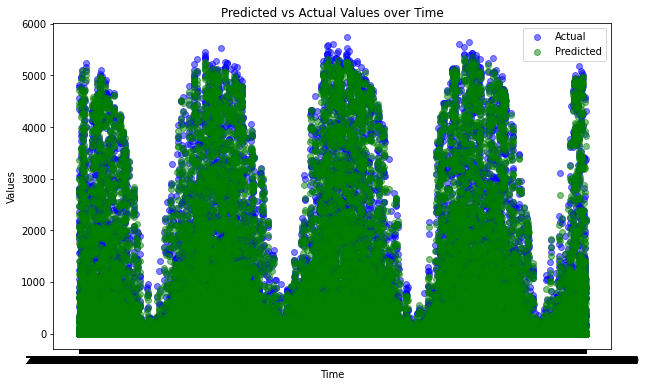

In [ ]:
import matplotlib.pyplot as plt
time_values = y_train_a['time']

# Calculate residuals
residuals = y_train_a['pv_measurement'] - pred_a_whole['pv_measurement']

# Plot actual vs. predicted values over time
plt.figure(figsize=(10, 6))

# Create a scatter plot for actual vs predicted values over time
plt.scatter(time_values, y_train_a['pv_measurement'], alpha=0.5, label='Actual', color='blue')
plt.scatter(time_values, pred_a_whole['pv_measurement'], alpha=0.5, label='Predicted', color='green')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values over Time')
plt.legend()
plt.show()

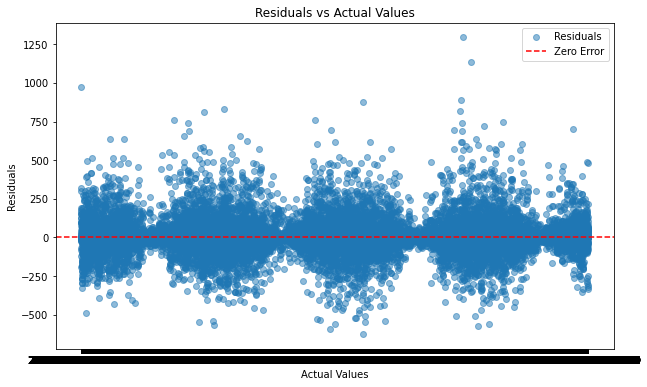

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(time_values, residuals, alpha=0.5, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error')  # Line for zero residual error
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.legend()
plt.show()

In [ ]:
# tscv = TimeSeriesSplit(n_splits=5)

# performance_metrics = []


# for train_idx, test_idx in tscv.split(x_train_a):
#     x_train_fold = x_train_a.iloc[train_idx]
#     y_train_fold = y_train_a.iloc[train_idx]
#     x_valid_fold = x_train_a.iloc[test_idx]
#     y_valid_fold = y_train_a.iloc[test_idx]

#     # Merge the data on the date
#     train_data_combined = x_train_fold.merge(y_train_fold, left_on='date_forecast', right_on='time', how='left')
#     valid_data_combined = x_valid_fold.merge(y_valid_fold, left_on='date_forecast', right_on='time', how='left')

#     # Drop redundant columns
#     train_data_combined.drop(columns=['time'], inplace=True)
#     valid_data_combined.drop(columns=['time'], inplace=True)


#     # Define the name of the target column
#     label = 'pv_measurement'  # Replace with the name of your target column
    
#     # Train the model
#     predictor = TabularPredictor(label=label, eval_metric= 'mean_absolute_error').fit(train_data_combined,tuning_data= valid_data_combined, time_limit= 900)
    
#     # Validate the model
#     performance = predictor.evaluate(valid_data_combined)
    
#     # Evaluate the performance (you can use any metric of your choice)

#     performance_metrics.append(performa)



No path specified. Models will be saved in: "AutogluonModels\ag-20231103_121524\"
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils.py:549: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels\ag-20231103_121524\"
AutoGluon Version:  0.8.2
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   694.73 GB / 1022.87 GB (67.9%)
Train Data Rows:    5685
Train Data Columns: 66
Tuning Data Rows:    5680
Tuning Data Columns: 66
Label Column: pv_measurement
Preprocessing data ...
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils.py:549: FutureWarning: use_inf_as_na option is deprecated and will be removed 

	Available Memory:                    5779.59 MB
	Train Data (Original)  Memory Usage: 6.77 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 4 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\features\generators\fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  X.fillna(self._fillna_feature_map, inplace=True, downcast=False)
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGen

NameError: name 'performa' is not defined

In [ ]:

residuals = y_train_a - pred_a_whole
residuals_with_time = residuals.rename(columns= {'pv_measurement':'residuals'})
residuals_with_time['time'] = time_values
residuals_with_time

residuals_with_time.set_index('time')

,residuals
time,
2019-06-02 22:00:00,0.269903
2019-06-02 23:00:00,0.122004
2019-06-03 00:00:00,0.191612
2019-06-03 01:00:00,-1.080068
2019-06-03 02:00:00,-19.738022
...,...
2023-04-30 19:00:00,2.064701
2023-04-30 20:00:00,-0.202846
2023-04-30 21:00:00,-0.049184


In [ ]:
outliers = residuals_with_time[(residuals_with_time['residuals'] > 500) | (residuals_with_time['residuals'] < -400)]
inliers = residuals_with_time[(residuals_with_time['residuals'] <= 500) | (residuals_with_time['residuals'] >= -400)]

outliers.set_index('time')



NameError: name 'residuals_with_time' is not defined

In [ ]:
train_data_a_copy = train_data_a
train_data_a_copy['time'] = x_train_a_combined['date_forecast']
train_data_a_copy.merge(outliers,on='time')

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,direct_rad_x_sun_elevation,pv_measurement,observed,time,residuals
0,8.950,1.19900,4060.875,11783602.0,822.500000,4060.875,0.0,282.875,211.300000,2662814.2,...,0.0,2019,6,4,11,12465.916000,4339.72,1,2019-06-04 11:00:00,976.092559
1,11.475,1.17850,2997.900,10495266.0,767.550000,2997.900,0.0,286.875,151.025000,2069067.9,...,0.0,2019,6,16,9,23054.926000,3253.36,1,2019-06-16 09:00:00,-487.213242
2,6.425,1.22850,1398.325,11846065.0,810.400000,1398.325,0.0,277.700,243.600000,3437885.2,...,0.0,2019,7,2,12,3761.031500,3530.78,1,2019-07-02 12:00:00,515.830293
3,7.900,1.20550,3086.100,8838911.0,638.550050,3086.100,0.0,281.000,212.175000,2414230.5,...,0.0,2019,8,22,10,10775.086000,3609.54,1,2019-08-22 10:00:00,637.752402
4,10.925,1.20400,1245.700,8480092.0,574.575000,1245.700,0.0,285.650,109.250000,1850785.8,...,0.0,2019,9,1,12,820.950560,3800.50,1,2019-09-01 12:00:00,513.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,7.450,1.20450,NaN,4983308.0,311.850000,1293.100,0.0,280.000,77.775000,1141199.0,...,0.0,2022,9,28,13,3976.922900,666.60,1,2022-09-28 13:00:00,-452.478613
118,6.900,1.22300,NaN,4278830.0,334.975000,NaN,0.0,278.775,65.975000,926758.1,...,0.0,2022,9,29,9,5449.697800,1609.96,1,2022-09-29 09:00:00,-419.385703
119,7.050,1.23375,4061.550,3763708.0,244.049990,895.900,0.0,278.850,81.475006,1206331.0,...,0.0,2022,10,15,12,24.004026,1973.62,1,2022-10-15 12:00:00,566.998174
120,6.200,1.26750,1165.150,1181184.1,120.100006,908.700,0.0,276.975,54.399998,537542.2,...,0.0,2022,10,20,8,42.163795,1942.16,1,2022-10-20 08:00:00,605.949307


In [ ]:
import os

# Store the cleaned datasets
output_dir = 'cleaned_data'
# Ensure directory exists, if not create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Directories for each location
dir_a = os.path.join(output_dir, 'A')
dir_b = os.path.join(output_dir, 'B')
dir_c = os.path.join(output_dir, 'C')

# Ensure subdirectories exist
for dir_path in [dir_a, dir_b, dir_c]:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)



# Saving datasets for location A
x_train_a_hourly.to_csv(os.path.join(dir_a, 'x_train_a.csv'))
x_test_a_hourly.to_csv(os.path.join(dir_a, 'x_test_a.c

No path specified. Models will be saved in: "AutogluonModels\ag-20231026_153540\"


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 3>:3                                                                              │
│                                                                                                  │
│   1 # Begin with A                                                                               │
│   2                                                                                              │
│ ❱ 3 predictor = TabularPredictor(label='pv_measurement').fit(train_data=x_train, tuning_data     │
│   4 predictions = predictor.predict()  # Assuming x_test is your test data                       │
│   5                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'x_train' is not defined